In [1]:
# https://stackoverflow.com/questions/7486940/embarassingly-parallel-db-update-using-python-postgis-postgresql?noredirect=1&lq=1

In [3]:
import sys

In [4]:
sys.path.append('..')

In [5]:
from nbhd.data import Base

Initializing database connection...
Database connected!


In [6]:
db = Base()

In [7]:
encs = db.select('enclosures')

In [8]:
len(encs)

58410

In [24]:
encs['area'] = encs.geometry.apply(lambda x: x.area)

In [91]:
encs.area.describe()

count    5.841000e+04
mean     3.646070e+06
std      3.867806e+07
min      2.686437e-09
25%      8.312939e+02
50%      7.876712e+03
75%      2.340484e+05
max      2.636936e+09
dtype: float64

In [105]:
twenty = encs.sort_values('area', ascending=False).iloc[5000:5020]

In [119]:
p = twenty.iloc[2].geometry.centroid

In [30]:
from nbhd.geography import Neighbourhood

In [120]:
n = Neighbourhood(p)

In [121]:
n.get_data()

Getting data took 0 minutes, 0 seconds.


In [122]:
n.find_neighbours()

In [123]:
n.geom.area

3154336.2898865542

<AxesSubplot:>

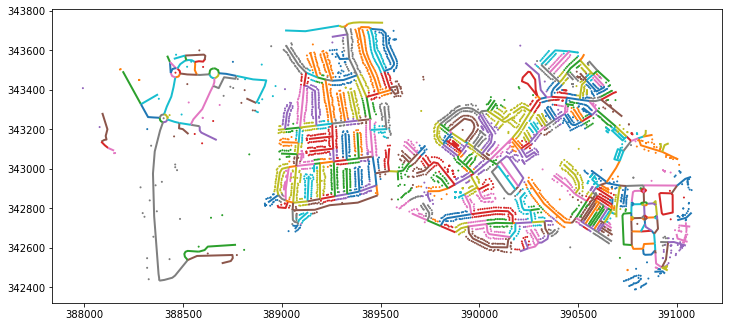

In [126]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
n.uprn.plot('street', ax=ax, markersize=1)
n.roads.plot('id', ax=ax, linewidth=2)

In [37]:
n.roads.roadFunction.unique()

array(['Restricted Local Access Road', 'Local Road', 'Minor Road',
       'Secondary Access Road', 'B Road', 'Local Access Road', 'A Road'],
      dtype=object)

In [38]:
db.ls()

['spatial_ref_sys',
 'opennames',
 'openrivers',
 'openroads',
 'boundaryline',
 'openmaplocal',
 'opengreenspace',
 'openuprn',
 'opentoid',
 'code_point_open',
 'railways',
 'rivers',
 'coastline',
 'roadnodes',
 'boundary_line_ceremonial_counties',
 'boundary_line_historic_counties',
 'community_ward',
 'country_region',
 'county',
 'county_electoral_division',
 'district_borough_unitary',
 'district_borough_unitary_ward',
 'english_region',
 'greater_london_const',
 'high_water',
 'historic_european_region',
 'parish',
 'polling_districts_england',
 'scotland_and_wales_const',
 'scotland_and_wales_region',
 'unitary_electoral_division',
 'westminster_const',
 'enclosures']

In [56]:
n0_names = db.contains('opennames', n0.geom.wkt)

In [58]:
n0_names.columns

Index(['ID', 'NAMES_URI', 'NAME1', 'NAME1_LANG', 'NAME2', 'NAME2_LANG', 'TYPE',
       'LOCAL_TYPE', 'MOST_DETAIL_VIEW_RES', 'LEAST_DETAIL_VIEW_RES',
       'MBR_XMIN', 'MBR_YMIN', 'MBR_XMAX', 'MBR_YMAX', 'POSTCODE_DISTRICT',
       'POSTCODE_DISTRICT_URI', 'POPULATED_PLACE', 'POPULATED_PLACE_URI',
       'POPULATED_PLACE_TYPE', 'DISTRICT_BOROUGH', 'DISTRICT_BOROUGH_URI',
       'DISTRICT_BOROUGH_TYPE', 'COUNTY_UNITARY', 'COUNTY_UNITARY_URI',
       'COUNTY_UNITARY_TYPE', 'REGION', 'REGION_URI', 'COUNTRY', 'COUNTRY_URI',
       'RELATED_SPATIAL_OBJECT', 'SAME_AS_DBPEDIA', 'SAME_AS_GEONAMES',
       'geometry'],
      dtype='object')

In [70]:
df = n0_names

array(['L13 8DN', 'L13 8DG', 'L13 9BU', 'L13 8BA', 'L13 9DA', 'L13 9BS',
       'L13 8AU', 'L13 8BW', 'L13 8AT', 'L13 9AP', 'L13 8AS', 'L13 8AY',
       'L13 8BU', 'L13 8BB', 'L13 9DP', 'L13 0AL', 'L13 8DB', 'L13 8DY',
       'L13 9BQ', 'L13 9BT', 'L13 8DH', 'L13 9BY', 'L13 8BR', 'L13 9BL',
       'L13 9AD', 'L13 8DD', 'L13 8DE', 'L13 9AJ', 'L13 9DF', 'L13 8BL',
       'L13 8DW', 'L13 8BX', 'L13 9DH', 'L13 8DL', 'L13 8AG', 'L13 9AB',
       'L13 9AZ', 'L13 8BT', 'L13 9DN', 'L13 8AD', 'L13 8DQ', 'L13 8EN',
       'L13 8BJ', 'L13 9AU', 'L13 9AT', 'L13 9AY', 'L13 8AA', 'L13 8BP',
       'L13 8DZ', 'L13 9AG', 'L13 9BE', 'L13 9DR', 'L13 9AE', 'L13 9BR',
       'L13 9BH', 'L13 9BX', 'L13 9AF', 'L13 8AZ', 'L13 8AX', 'L13 8DA',
       'L13 9DE', 'L13 9DJ', 'L13 9BA', 'L13 9DB', 'L13 8DP', 'L13 9AW',
       'L13 0AJ', 'L13 8BD', 'L13 9AQ', 'L13 8ED', 'L13 9BG', 'L13 8DT',
       'L13 9BP', 'L13 8AE', 'L13 8BY', 'L13 9BZ', 'L13 8AL', 'L13 9AH',
       'L13 9BB', 'L13 8DS', 'L13 8DF', 'L13 8DU', 

In [69]:
df.loc[df.LOCAL_TYPE.str.contains('Education')]

,ID,NAMES_URI,NAME1,NAME1_LANG,NAME2,NAME2_LANG,TYPE,LOCAL_TYPE,MOST_DETAIL_VIEW_RES,LEAST_DETAIL_VIEW_RES,...,COUNTY_UNITARY_URI,COUNTY_UNITARY_TYPE,REGION,REGION_URI,COUNTRY,COUNTRY_URI,RELATED_SPATIAL_OBJECT,SAME_AS_DBPEDIA,SAME_AS_GEONAMES,geometry
150,osgb4000000073304629,http://data.ordnancesurvey.co.uk/id/4000000073...,Roscoe Primary School,None,None,None,other,Primary Education,1000,50000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338450.000 393048.000)


In [55]:
n0 = Neighbourhood()

In [ ]:
n0

In [45]:
toid = db.select('opentoid')

In [51]:
df = toid.loc[toid.geometry.apply(lambda x: n.geom.contains(x))]

In [52]:
df

,TOID,VERSION_NUMBER,VERSION_DATE,EASTING,NORTHING,geometry


In [46]:
toid['here'] = toid.geometry.apply(lambda )

,TOID,VERSION_NUMBER,VERSION_DATE,EASTING,NORTHING,geometry
0,osgb1000000042003606,4,2014-01-15T00:00:00+00:00,453333.820,1203415.830,POINT (453333.820 1203415.830)
1,osgb1000000042003619,7,2020-03-11T00:00:00+00:00,453716.236,1204007.649,POINT (453716.236 1204007.649)
2,osgb1000000042003622,2,2006-03-01T00:00:00+00:00,453570.984,1203346.378,POINT (453570.984 1203346.378)
3,osgb1000000042003628,2,2006-03-01T00:00:00+00:00,453414.010,1203628.560,POINT (453414.010 1203628.560)
4,osgb1000000042003630,5,2014-01-15T00:00:00+00:00,453240.175,1203863.648,POINT (453240.175 1203863.648)
...,...,...,...,...,...,...
81630,osgb5000005263006804,1,2020-03-27T00:00:00+00:00,460463.004,1211768.515,POINT (460463.004 1211768.515)
81631,osgb5000005263006806,1,2020-03-27T00:00:00+00:00,460465.020,1211768.761,POINT (460465.020 1211768.761)
81632,osgb5000005263008633,1,2020-03-27T00:00:00+00:00,463255.605,1211845.214,POINT (463255.605 1211845.214)
81633,osgb5000005263008634,1,2020-03-27T00:00:00+00:00,461739.812,1209935.451,POINT (461739.812 1209935.451)
